# Objective of the analysis:
- Increase Occupancy rate
- Improve Pricing Strategy
- Enhance Customer experience

## Integrating SQL with Python 
- To extract data from database
- For various analysis processes

## Importing required libraries 

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Connection with Database

In [2]:
#building the connection
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [3]:
#Exploring various tables in database
cursor.execute("select name from sqlite_master where type = 'table';")
print('List of tables in the database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

## Data Exploration in various tables
- For better understanding of the dataset
- To gain clarity about different variables

In [4]:
#Table: aircrafts_data
aircrafts_data = pd.read_sql_query(f"SELECT * FROM aircrafts_data", connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [5]:
#Table: airports_data
airports_data = pd.read_sql_query(f"SELECT * FROM airports_data", connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [6]:
#Table: boarding_passes
boarding_passes = pd.read_sql_query(f"SELECT * FROM boarding_passes", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [7]:
#Table: bookings
bookings = pd.read_sql_query(f"SELECT * FROM bookings", connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [8]:
#Table: flights
flights = pd.read_sql_query(f"SELECT * FROM flights", connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [9]:
#Table: seats
seats = pd.read_sql_query(f"SELECT * FROM seats", connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [10]:
#Table: ticket_flights
ticket_flights = pd.read_sql_query(f"SELECT * FROM ticket_flights", connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [11]:
#Table: tickets
tickets = pd.read_sql_query(f"SELECT * FROM tickets", connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


## Depicting the columns & data type in each table 

In [12]:
for table in table_list:
    print("\nTable: " + table)
    columns_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in columns_info.fetchall():
        print(column[1:3])


Table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

Table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

Table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

Table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

Table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

Table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

## Data Cleaning

In [13]:
# checking for missing values in each column across every table
print(f'Missing Values in columns across tables:')
for table in table_list:
    print(f'\nTable: {table}')
    df_table = pd.read_sql_query(f"SELECT * FROM {table};", connection)
    print(df_table.isnull().sum())

Missing Values in columns across tables:

Table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

Table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

Table: tickets
ticket_no       0
book_ref        0
passenger_i

### Foundational Analysis

#### Number of planes with Seating Capacity surpassing 100
- To understand about Capacity planning
- Route optimisation for accomodating passengers

In [14]:
# To find planes with seats > 100
pd.read_sql_query(f"""SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                        GROUP BY aircraft_code 
                        HAVING num_seats > 100 
                        ORDER BY num_seats DESC;""", connection)

,aircraft_code,num_seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


#### Ticket Bookings & Fluctuations of Total Earnings over time
- Trend analysis and Demand forecasting
- Performance evaluation and benchmarking

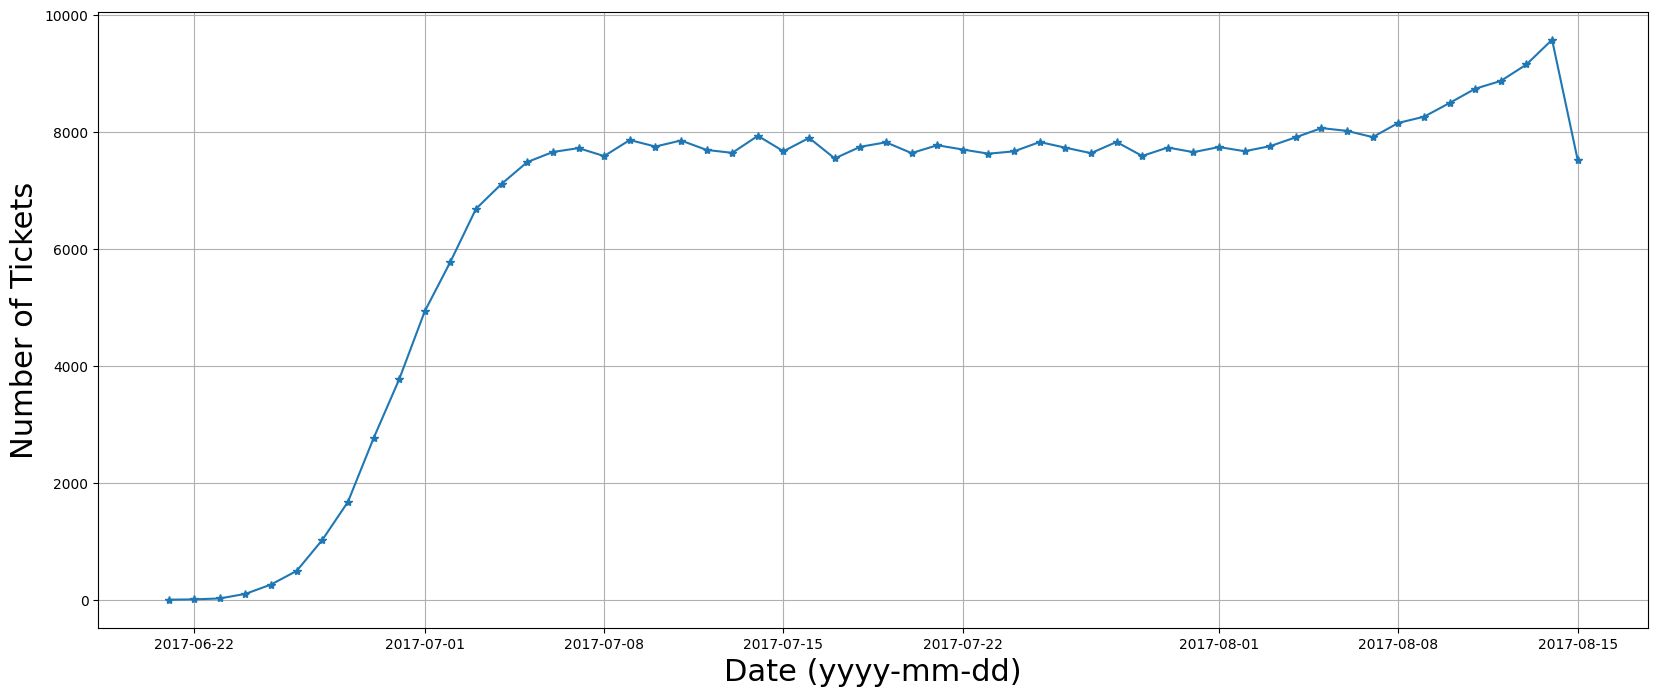

In [15]:
# Inner joining two tables to match for booked tickets only (to avoid all ticket reference being counted)
# Matched on the criteria of booking reference number in Tickets and bookings table

tickets = pd.read_sql_query(f"""SELECT *
                                FROM tickets
                                INNER JOIN bookings 
                                ON tickets.book_ref=bookings.book_ref;""", connection)

# Converting from object type to datetime type
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
# To obtain data specifically from the value combined with data and time
tickets['date'] = tickets['book_date'].dt.date


# Visualising the count of bookings in each date through line chart
x =  tickets.groupby('date')[['date']].count()
plt.figure(figsize = (20,8))
plt.plot(x.index,x['date'], marker = '*')
plt.xlabel('Date (yyyy-mm-dd)', fontsize = 22)
plt.ylabel('Number of Tickets', fontsize = 22)
plt.grid('b')
plt.show()

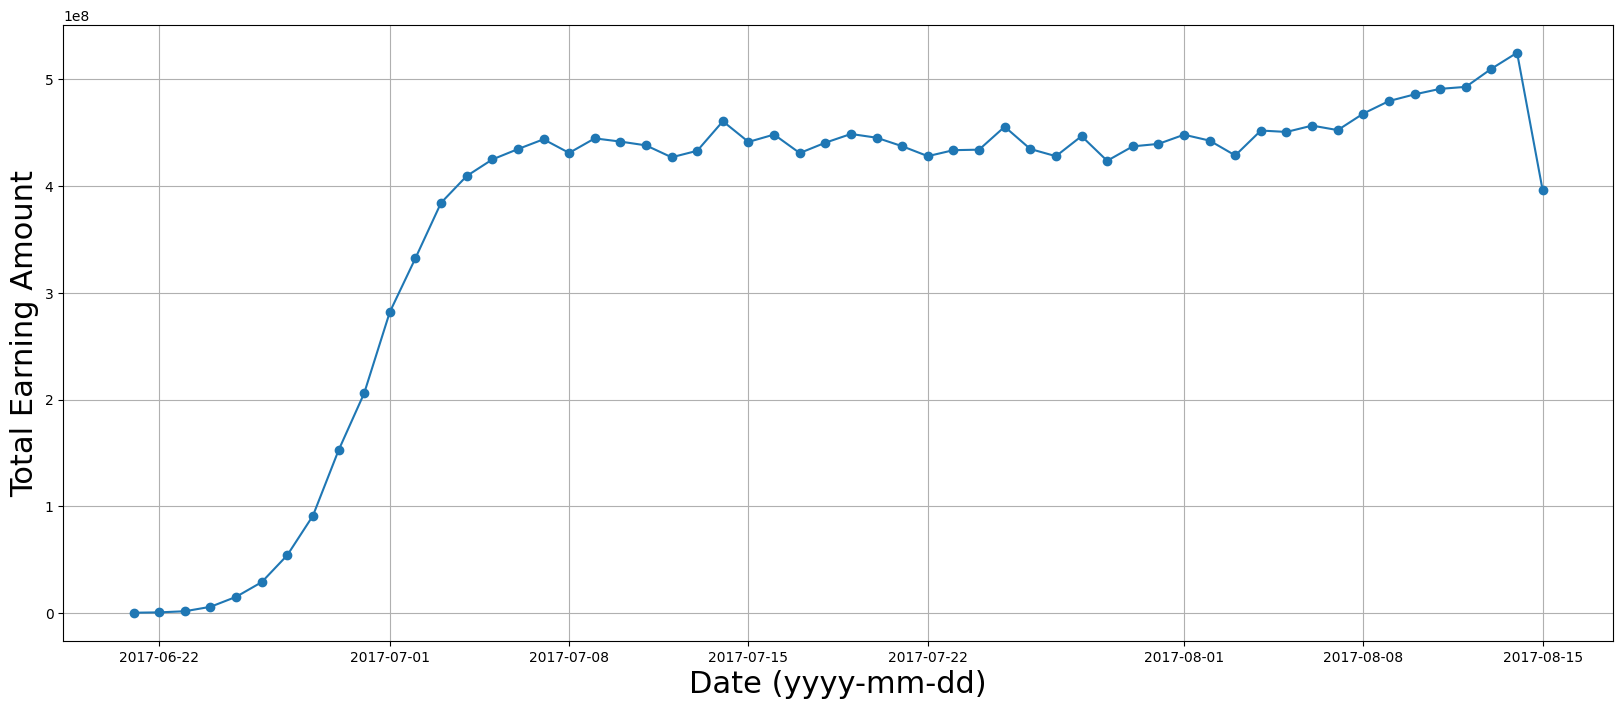

In [16]:
# To calculate the total amount
bookings = pd.read_sql_query(f"""SELECT * FROM bookings""", connection)

# Converting from object type to datetime type
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
# To obtain date specifically 
bookings['date'] = bookings['book_date'].dt.date

y =  bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize = (20,8))
plt.plot(y.index,y['total_amount'], marker = 'o')
plt.xlabel('Date (yyyy-mm-dd)', fontsize = 22)
plt.ylabel('Total Earning Amount', fontsize = 22)
plt.grid('b')
plt.show()

#### Computing Average fare for individual aircraft across different fare conditions
- Cost management for profitability
- Customer segmentations along with preference

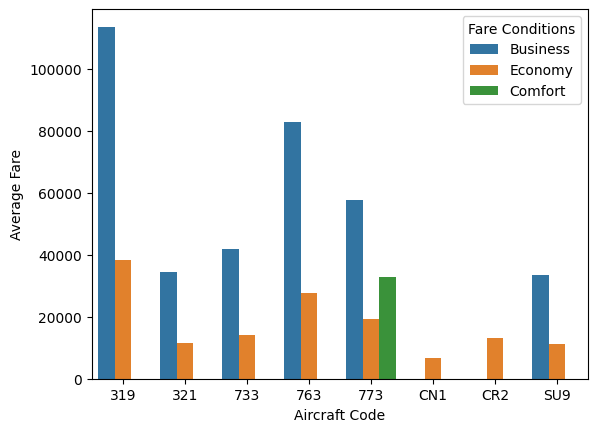

In [17]:
# Joining tables - ticket_flights and flights with criteria matching in flight_id
df = pd.read_sql_query(f"""SELECT fare_conditions, aircraft_code, AVG(amount) as avg_amount FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code, fare_conditions""", connection)

# Plot and Visualisation through bar chart    
sns.barplot(data = df, x = 'aircraft_code', y ='avg_amount', hue = 'fare_conditions')

#Assigning custom labels
plt.xlabel('Aircraft Code')  # for x-axis
plt.ylabel('Average Fare')  # for y-axis
plt.legend(title='Fare Conditions')
plt.show()

## Analysing Occupancy Rate

#### Every Aircraft - Yearly total revenue & Average revenue per ticket
- Yearly trend analysis
- Cost allocation against operation expenses

In [18]:
pd.set_option('display.float_format', str)

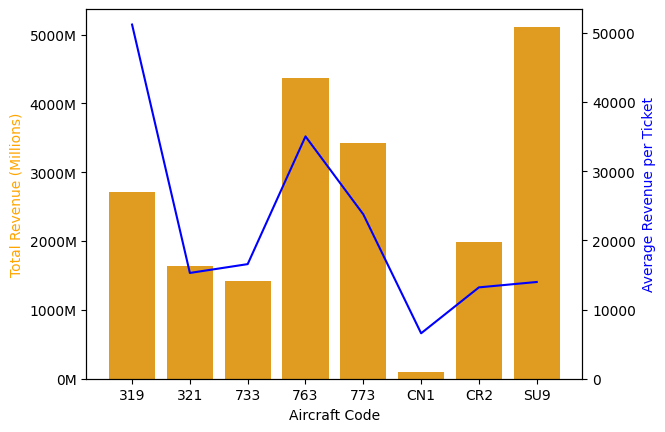

In [19]:
df = pd.read_sql_query(f"""SELECT aircraft_code, total_revenue, ticket_count, (total_revenue/ticket_count) as avg_revenue_per_ticket
                        FROM 
                        (SELECT aircraft_code, COUNT(*) as ticket_count, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code)""", connection)

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plotting the bar chart (Total revenue)
sns.barplot(data=df, x='aircraft_code', y='total_revenue', color='orange', ax=ax1)
ax1.set_xlabel('Aircraft Code')
ax1.set_ylabel('Total Revenue (Millions)', color='orange')  

# Convert total revenue to millions
total_revenue_millions = df['total_revenue'] / 1e6
ax1.set_ylim(bottom=0)  

# Format y-axis scale to represent values in millions
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6))
ax1.yaxis.set_major_formatter(formatter)

ax2 = ax1.twinx()

# Plotting the line chart (Average revenue per ticket)
sns.lineplot(data=df, x='aircraft_code', y='avg_revenue_per_ticket', color='blue', ax=ax2)
ax2.set_ylabel('Average Revenue per Ticket', color='blue')  # Label for right y-axis

# Set the y-axis limits for the line chart
ax2.set_ylim(bottom=0)
plt.show()

#### Average Occupancy per Aircraft
- Capacity Utilisation
- Operational Efficiency

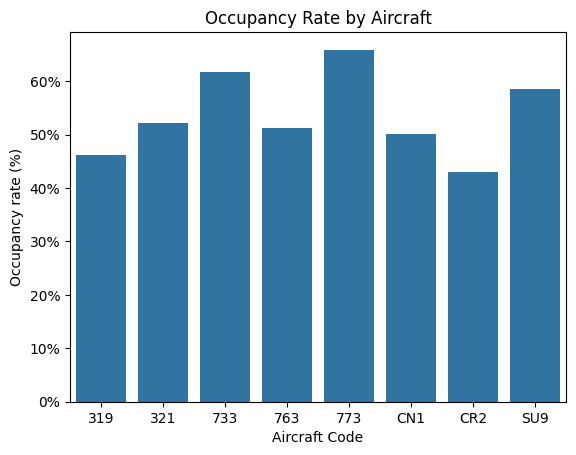

In [20]:
occupancy_rate = pd.read_sql_query(f"""SELECT a.aircraft_code, AVG(a.seats_count) as booked_seats, b.num_seats, 
(AVG(a.seats_count)/b.num_seats) as occupancy_rate
                            FROM (
                                SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
                                FROM boarding_passes
                                INNER JOIN flights 
                                ON boarding_passes.flight_id=flights.flight_id
                                GROUP BY aircraft_code, flights.flight_id
                                ) as a INNER JOIN
                                (
                                SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                                GROUP BY aircraft_code  
                                ) as b
                                ON a.aircraft_code = b.aircraft_code
                            GROUP BY a.aircraft_code""", connection)

ax = sns.barplot(data=occupancy_rate, x='aircraft_code', y='occupancy_rate')
plt.xlabel('Aircraft Code')
plt.ylabel('Occupancy rate (%)')
plt.title('Occupancy Rate by Aircraft')

# Format y-axis scale to represent values in percentages
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

plt.show()

#### Determining Potential increase in Annual Turnover
1. Increasing Occupancy rate of all aircrafts by 10%

- Cost-benefit analysis & Revenue forecasting

In [21]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate']*1.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372493
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484383
7,SU9,56.81211267605634,97,0.5856918832583128,0.6442610715841441


In [22]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code""", connection)
occupancy_rate['Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])
occupancy_rate['Inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*(occupancy_rate['Inc occupancy rate'])
occupancy_rate


,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Total Annual Turnover,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,5858459946.134425,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,3135798999.584243,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,2310768238.712515,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,8517171897.245315,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372493,5206531705.894529,3774326050.0000005
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,192605350.8487085,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484383,4614752665.292212,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.6442610715841441,8732381045.725222,5625933170.000001


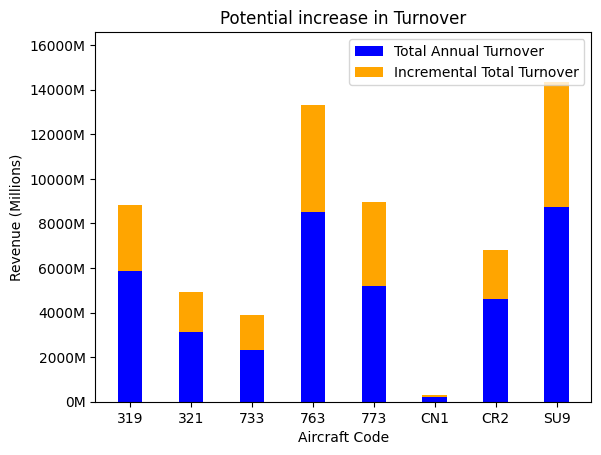

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the data
aircraft_codes = occupancy_rate['aircraft_code']
total_annual_turnover = occupancy_rate['Total Annual Turnover']
inc_total_annual_turnover = occupancy_rate['Inc Total Annual Turnover']

# Set the width of the bars
bar_width = 0.40

# Plot the stacked bars
fig, ax = plt.subplots()
ax.bar(aircraft_codes, total_annual_turnover, bar_width, label='Total Annual Turnover', color='blue')
ax.bar(aircraft_codes, inc_total_annual_turnover, bar_width, bottom=total_annual_turnover, label='Incremental Total Turnover', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Aircraft Code')
ax.set_ylabel('Revenue (Millions)')
ax.set_title('Potential increase in Turnover')

# Format y-axis scale to represent values in millions
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6))
ax.yaxis.set_major_formatter(formatter)

# Extend the y-axis limits
ax.set_ylim(top=ax.get_ylim()[1] * 1.1)  # Extend the y-axis limits by 10%

# Move the legend to a better position
ax.legend(loc='upper right')

plt.show()
